# 준비작업
## 1. 패키지 가져오기

In [1]:
from hossam import *

# 파이썬 기본 라이브러리
from pandas import DataFrame, concat, get_dummies
import numpy as np
from itertools import combinations

# 시각화 라이브러리
from matplotlib import pyplot as plt
import seaborn as sb

# 통계 라이브러리
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_reset, het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from pingouin import anova, welch_anova
from scipy.stats import (
    normaltest,
    bartlett,
    levene,
    ttest_ind,
    pearsonr,
    spearmanr,
    shapiro,
    jarque_bera,
    t,
    f,
)

# 머신러닝 라이브러리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

# 학습모델
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    SGDRegressor
)

# 성능 평가 지표 모듈
from sklearn.metrics import(
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

# 확률적 경사 하강법
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

c:\Users\wodyd\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📦 아이티윌 이광호 강사가 제작한 라이브러리를 사용중입니다.
📚 자세한 사용 방법은 https://py.hossam.kr 을 참고하세요.
📧 Email: leekh4232@gmail.com
🎬 Youtube: https://www.youtube.com/@hossam-codingclub
📝 Blog: https://blog.hossam.kr/
🔖 Version: 0.4.18

✅ 시각화를 위한 한글 글꼴(NotoSansKR-Regular)이 자동 적용되었습니다.


## 2. 데이터 가져오기

In [2]:
origin = load_data('restaurant_sales')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

어느 식당의 1년간 일별 매출을 기록한 데이터로, 매출액을 종속변수로 하고 방문객 수, 객단가, 광고비, 날씨, 요일, 식당 유형 등의 정보를 포함함.

컬럼명           변수 타입    데이터 성격    설명
---------------  -----------  -------------  -------------------------------------------------------
date             날짜         시계열 인덱스  관측 날짜 (1년, 일 단위)
sales            연속형       수치           일 매출액 (종속변수). 이상치·왜도 존재 → 로그 변환 대상
visitors         연속형       수치           일 방문객 수. 매출과 강한 양의 관계
avg_price        연속형       수치           평균 객단가. 양의 왜도 → 로그 변환 권장
marketing_cost   연속형       수치           일 광고비 지출. 이상치·결측치 포함
delivery_ratio   연속형       비율           배달 매출 비중 (0~1). 비선형 효과 가능
rain_mm          연속형       수치           일 강수량(mm). 일부 결측치 존재
temperature      연속형       수치           일 평균 기온(℃). 계절성 반영
holiday          명목형       이진           공휴일 여부 (0=평일, 1=공휴일)
weekend          명목형       이진           주말 여부 (0=평일, 1=주말)
restaurant_type  명목형       범주           식당 유형 (한식/중식/양식/카페) → 원핫인코딩 필요

데이터셋 크기: (365, 11)
열 개수: 11
행 개수: 365
<class 'pandas.core.frame.DataFrame'>
RangeI

,date,sales,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday,weekend,restaurant_type
0,2024-01-01,10525760,122,14490,9900.0,0.48,6.0,5.2,0,0,한식
1,2024-01-02,8931390,106,11880,9400.0,0.48,7.0,11.1,0,0,중식
2,2024-01-03,12654970,120,18010,5800.0,0.43,12.4,12.9,1,0,한식
3,2024-01-04,9650090,115,11160,6300.0,0.41,6.6,12.9,0,0,중식
4,2024-01-05,9951380,124,15480,5400.0,0.51,8.0,11.0,0,0,카페


## 3. 데이터 타입 변환 + 인덱스 설정

In [3]:
df1 = origin.astype(
    {'restaurant_type': 'category', 'holiday': 'category','weekend': 'category'}
)
df1.set_index('date', inplace = True)
display(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-01 to 2024-12-30
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sales            365 non-null    int64   
 1   visitors         365 non-null    int64   
 2   avg_price        365 non-null    int64   
 3   marketing_cost   359 non-null    float64 
 4   delivery_ratio   365 non-null    float64 
 5   rain_mm          359 non-null    float64 
 6   temperature      365 non-null    float64 
 7   holiday          365 non-null    category
 8   weekend          365 non-null    category
 9   restaurant_type  365 non-null    category
dtypes: category(3), float64(4), int64(3)
memory usage: 24.3 KB


None

,sales,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday,weekend,restaurant_type
date,,,,,,,,,,
2024-01-01,10525760,122,14490,9900.0,0.48,6.0,5.2,0,0,한식
2024-01-02,8931390,106,11880,9400.0,0.48,7.0,11.1,0,0,중식
2024-01-03,12654970,120,18010,5800.0,0.43,12.4,12.9,1,0,한식
2024-01-04,9650090,115,11160,6300.0,0.41,6.6,12.9,0,0,중식
2024-01-05,9951380,124,15480,5400.0,0.51,8.0,11.0,0,0,카페


## 미션 1. 이 데이터를 그대로 쓰면 어떤 문제가 생길까?
### 1. 결측치 확인
#### 1. 결측치 수 측정

In [4]:
n = len(df1)

missing_df = DataFrame({'missing_count': df1.isnull().sum()})
missing_df['missing_ratio'] = missing_df['missing_count'] / n
display(missing_df)


,missing_count,missing_ratio
sales,0,0.000000
visitors,0,0.000000
avg_price,0,0.000000
marketing_cost,6,0.016438
delivery_ratio,0,0.000000
rain_mm,6,0.016438
temperature,0,0.000000
holiday,0,0.000000
weekend,0,0.000000
restaurant_type,0,0.000000


#### 2. 독립검정 t-test 함수 정의

In [5]:
def hs_ttest_ind(x_data, y_data):
    # 정규성 판별
    _, p1 = normaltest(x_data)
    _, p2 = normaltest(y_data)
    normal_dist = p1 > 0.05 and p2 > 0.05

    # 등분산성 팔별
    if normal_dist:
        method_name = 'Bartlett'
        s, p = bartlett(x_data, y_data)
    else:
        method_name = 'Levene'
        s, p = levene(x_data, y_data)

    equal_var = p > 0.05

    # 독립표본 t-검정 수행
    alternative: list = ['two-sided','less','greater']
    result: list =[]
    fmt: str = 'u(x) {0} u(y)'

    for a in alternative:
        s, p =ttest_ind(x_data, y_data, equal_var = equal_var, alternative = a)
        n = 't-test_ind' if equal_var else "Welch's t-test"

        # 검정 결과 해석
        itp = None

        if a == 'two-sided':
            itp = fmt.format('==' if p > 0.05 else '!=') # type: ignore
        elif a == 'less':
            itp = fmt.format('==' if p > 0.05 else '<') # type: ignore
        else:
            itp = fmt.format('<=' if p > 0.05 else '>') # type: ignore

        result.append(
            {
                'test': n,
                'alternative': a,
                'interpretation': itp,
                'normaltest': normal_dist,
                method_name: equal_var,
                n: round(s, 3), # type: ignore
                'p-value': round(p, 4), # type: ignore
                'H0': p > 0.05, # type: ignore
                'H1': p <= 0.05 # type: ignore
            }
        )

    rdf = DataFrame(result)
    rdf.set_index(['test','alternative'], inplace = True)
    return rdf


#### 3. marketing_cost 삭제 전후의 종속변수에 대해 평균족으로 유의미한 변화가 있는지 확인

In [6]:
df_temp = df1.dropna(subset = ['marketing_cost']) # type: ignore
hs_ttest_ind(origin['sales'], df_temp['sales']) # type: ignore

interpretation  normaltest  Levene  t-test_ind  \
test       alternative                                                  
t-test_ind two-sided     u(x) == u(y)       False    True      -0.041   
           less          u(x) == u(y)       False    True      -0.041   
           greater       u(x) <= u(y)       False    True      -0.041   

                        p-value    H0     H1  
test       alternative                        
t-test_ind two-sided     0.9673  True  False  
           less          0.4836  True  False  
           greater       0.5164  True  False

#### 4. rain_mm 삭제 전후의 종속변수에 대해 평균적으로 유의미한 변화가 있는지 확인

In [7]:
df_temp = df1.dropna(subset = ['rain_mm']) # type: ignore
df1_target = df1['sales'] # type: ignore
df_temp_target = df_temp['sales']

hs_ttest_ind(df1_target, df_temp_target)

interpretation  normaltest  Levene  t-test_ind  \
test       alternative                                                  
t-test_ind two-sided     u(x) == u(y)       False    True       0.147   
           less          u(x) == u(y)       False    True       0.147   
           greater       u(x) <= u(y)       False    True       0.147   

                        p-value    H0     H1  
test       alternative                        
t-test_ind two-sided     0.8830  True  False  
           less          0.5585  True  False  
           greater       0.4415  True  False

#### 5. 모든 결측치 일괄 삭제 전후의 종속변수에 대해 평균적으로 유의미한 변화가 있는지 확인

In [8]:
df_temp = df1.dropna()
df1_target = df1['sales']
df_temp_target = df_temp['sales']

hs_ttest_ind(df1_target, df_temp_target)

interpretation  normaltest  Levene  t-test_ind  \
test       alternative                                                  
t-test_ind two-sided     u(x) == u(y)       False    True       0.107   
           less          u(x) == u(y)       False    True       0.107   
           greater       u(x) <= u(y)       False    True       0.107   

                        p-value    H0     H1  
test       alternative                        
t-test_ind two-sided     0.9144  True  False  
           less          0.5428  True  False  
           greater       0.4572  True  False

### 2. 결측치 삭제

In [9]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2024-01-01 to 2024-12-30
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sales            353 non-null    int64   
 1   visitors         353 non-null    int64   
 2   avg_price        353 non-null    int64   
 3   marketing_cost   353 non-null    float64 
 4   delivery_ratio   353 non-null    float64 
 5   rain_mm          353 non-null    float64 
 6   temperature      353 non-null    float64 
 7   holiday          353 non-null    category
 8   weekend          353 non-null    category
 9   restaurant_type  353 non-null    category
dtypes: category(3), float64(4), int64(3)
memory usage: 23.5 KB


### 3. 이상치 확인
#### 1. 이상치 확인 함수

In [10]:
def hs_outlier_table(data: DataFrame):
    fields = data.select_dtypes(include = np.number).columns
    
    result = []
    for f in fields:

        # 사분위수
        q1 = data[f].quantile(q=0.25)
        q2 = data[f].quantile(q=0.5)
        q3 = data[f].quantile(q=0.75)
        min_value = data[f].min()
        max_value = data[f].max()

        # 이상치 경계 (Tukey's fences)
        iqr = q3 - q1
        down = q1 - 1.5 * iqr
        up = q3 + 1.5 * iqr
        
        #왜도
        skew = data[f].skew()

        # 이상치 개수 및 비율
        outlier_count = ((data[f] < down) | (data[f] > up)).sum()
        outlier_rate = (outlier_count / len(data)) * 100

        #왜도
        skew = data[f].skew()

        # 이상치 개수 및 비율
        outlier_count = ((data[f] < down) | (data[f] > up)).sum()
        outlier_rate = (outlier_count / len(data)) * 100

        # 분포 특성 판정 (왜도 기준)
        abs_skew = abs(skew)
        if abs_skew < 0.5:
            dist = '거의 대칭'
        elif abs_skew < 1.0:
            if skew > 0:
                dist = '약한 우측 꼬리'
            else:
                dist = '약한 좌측 꼬리'
        elif abs_skew < 2.0:
            if skew > 0:
                dist = '중간 우측 꼬리'
            else:
                dist = '중간 좌측 꼬리'
        else:
            if skew > 0:
                dist = '극단 우측 꼬리'
            else:
                dist = '극단 좌측 꼬리'

        # 로그변환 필요성 판정
        if abs_skew < 0.5:
            log_need = '낮음'
        elif abs_skew < 1.0:
            log_need = '중간'
        else:
            log_need = '높음'
        
        iq = {
            'field': f,
            'q1': q1,
            'q2': q2,
            'q3': q3,
            'iqr': iqr,
            'up': up,
            'down': down,
            'min': min_value,
            'max': max_value,
            'outlier_count': outlier_count,
            'outlier_rate': outlier_rate,
            'skew': skew,
            'dist': dist,
            'log_need': log_need
        }

        result.append(iq)
    
    return DataFrame(result).set_index('field')

#### 2. 연속형 변수에 대한 이상치 확인

In [11]:
outlier = hs_outlier_table(df2)
outlier

,q1,q2,q3,iqr,up,down,min,max,outlier_count,outlier_rate,skew,dist,log_need
field,,,,,,,,,,,,,
sales,9620430.00,12203340.00,16828290.00,7207860.00,2.764008e+07,-1191360.000,5972790.00,38585880.00,10,2.832861,1.256981,중간 우측 꼬리,높음
visitors,113.00,120.00,126.00,13.00,1.455000e+02,93.500,83.00,151.00,6,1.699717,-0.014914,거의 대칭,낮음
avg_price,12480.00,15340.00,17550.00,5070.00,2.515500e+04,4875.000,6330.00,27280.00,5,1.416431,0.471286,거의 대칭,낮음
marketing_cost,4500.00,6800.00,10500.00,6000.00,1.950000e+04,-4500.000,1400.00,51700.00,12,3.399433,2.628738,극단 우측 꼬리,높음
delivery_ratio,0.36,0.45,0.53,0.17,7.850000e-01,0.105,0.17,0.77,0,0.000000,0.064028,거의 대칭,낮음
rain_mm,2.10,4.60,7.60,5.50,1.585000e+01,-6.150,0.00,20.00,8,2.266289,1.117849,중간 우측 꼬리,높음
temperature,-0.40,10.00,20.50,20.90,5.185000e+01,-31.750,-10.40,29.50,0,0.000000,0.011906,거의 대칭,낮음


## 미션 2. 어떤 변수를 분석에 사용해야 할까?
### 1. 명목형 변수 anova
#### 1. anova 분석 함수

In [12]:
def hs_oneway_anova(data: DataFrame, dv: str, between: str, alpha: float = 0.05):
    # 결측치 제거
    df_filtered = data[[dv, between]].dropna()

    # 1. 정규성 검정 (각 그룹별로 수행)
    # 그룹별로 이름 추출
    group_names = sorted(df_filtered[between].unique())

    # 모든 그룹이 정규성을 충족하는지 여부
    normality_satisfied = True

    for group in group_names:
        group_values = df_filtered[df_filtered[between] == group][dv].dropna()
        if len(group_values) > 0:
            s, p = normaltest(group_values)
            if p <= alpha:
                normality_satisfied = False
                break

    # 2. 등분산성 검정 (각 그룹별로 수행)
    # 각 그룹별로 데이터 분리
    group_data_dict = {}
    for group in group_names:
        group_data_dict[group] = (
            df_filtered[df_filtered[between] == group][dv].dropna().values
        )
    
    # 등분산 검정 수행
    if len(group_names) > 1:
        if normality_satisfied:
            # 정규성을 만족하면 Bartlett 검정
            s, p = bartlett(*group_data_dict.values())
            en = 'Bartlett'
        else:
            # 정규성을 만족하지 안흥면 Levene 검정
            s, p = levene(*group_data_dict.values())
            en = 'Levene'
        
        # 등분산성 충족 여부
        equal_var_satisfied = p > alpha
    else:
        # 각 그룹이 1개인 경우 등분산성 검정 불가능
        equal_var_satisfied = True

    # 3. ANOVA 수행
    anova_df: DataFrame
    anova_method: str

    if equal_var_satisfied:
        # 등분산을 만족할 때 일반적인 ANOVA 사용
        anova_method = 'ANOVA'
        anova_df = anova(data = df_filtered, dv = dv, between = between)
    else:
        # 등분산을 만족하지 않을 때 Welch's ANOVA 사용
        anova_method = 'Welch'
        anova_df = welch_anova(data = df_filtered, dv = dv, between = between)

    # ANOVA 결과에 메타정보 추가
    anova_df.insert(1, 'normality', normality_satisfied)
    anova_df.insert(2, en, equal_var_satisfied)
    anova_df[anova_method] = anova_df['p-unc'] <= alpha if 'p-unc' in anova_df.columns else False # type: ignore
    
    return anova_df

#### 2. 단일 변수(restaurant_type)이 매출에 영향을 주는지 확인

In [13]:
hs_oneway_anova(df2, dv = 'sales', between = 'restaurant_type')


,Source,normality,Levene,ddof1,ddof2,F,p-unc,np2,ANOVA
0,restaurant_type,False,True,3,349,0.208264,0.890657,0.001787,False


#### 3. 모든 명목형 변수에 대해 매출에 영향을 주는 변수인지 일괄 확인

In [14]:
anova_df = None

fields = df2.dtypes[df2.dtypes == 'category'].index.tolist()

for f in fields:
    anova_result = hs_oneway_anova(df2, dv='sales', between = f)
    if anova_df is None:
        anova_df = anova_result
    else:
        anova_df = concat([anova_df, anova_result], ignore_index = True)
anova_df

,Source,normality,Levene,ddof1,ddof2,F,p-unc,np2,Welch,ANOVA
0,holiday,False,False,1,152.174741,256.187649,1.953192e-34,0.513450,True,NaN
1,weekend,False,False,1,129.568243,299.612481,1.677095e-35,0.559832,True,NaN
2,restaurant_type,False,True,3,349.000000,0.208264,8.906571e-01,0.001787,NaN,False


#### 인사이트

- holiday, weekend 변수는 매출액에 통계적으로 유의미한 영향을 미침
    - p-unc 값이 0.000으로 매우 작고, ANOVA 결과도 True임
    - np2(효과크기)도 각각 0.234, 0.241로 비교적 큼
- restaurant_type 변수는 매출액에 유의미한 영향을 주지 않음
    - p-unc 값이 0.710으로 0.05보다 큼
    - ANOVA 결과도 False임
    - np2(효과크기)도 0.004로 매우 작음
- 결론적으로, 매출액에 영향을 주는 명목형 변수는 holiday, weekend임
    - restaurant_type 변수는 모델에서 제거해도 무방

### 2. 종속변수를 제외한 연속형 변수끼리의 상관분석
#### 1. 쌍별 상관분석 함수

In [15]:
def hs_corr_pairwise(data):
    alpha = 0.05 # 상관분석 유의수준 기준
    z_thresh = 3.0 # 이상치 판단 임계값(|Z| 기준)
    min_n = 8 # 쌍별 최소 표본 크기

    # 컬럼 선정 (숫자형만)
    cols = data.select_dtypes(include = [np.number]).columns.tolist()

    # 사용 가능한 컬럼이 2개 미만이면 상관분석 불가능
    if len(cols) < 2:
        raise ValueError('숫자형 컬럼이 두 개 이상 있어야 상관분석 가능')
    
    # z-score 기반 이상치 유무 계산
    z_outlier_flags ={}
    for c in cols:
        col = data[c].dropna()
        if col.std(ddof=1) == 0:
            z_outlier_flags[c] = False
            continue
        z = (col - col.mean()) / col.std(ddof=1)
        z_outlier_flags[c] = (z.abs() > z_thresh).any()

    rows = []

    for a, b in combinations(cols, 2):
        # 조합쌍만 데이터프레임으로 추출 후, 결측치 제거
        pair_df = data[[a,b]].dropna()

        # 표본이 너무 적으면 계산하지 않음
        if len(pair_df) < min_n:
            rows.append(
                {
                    'var_a': a,
                    'var_b': b,
                    'n': len(pair_df),
                    'linearity': False,
                    'outlier_flag': True,
                    'chosen': None,
                    'corr': np.nan,
                    'pval': np.nan,
                    'significant': False,
                    'strength': 'no correlation'
                }
            )
            continue

        x = pair_df[a]
        y = pair_df[b]

        # 1) 선형성: Ramsey RESET(지정 차수 전부 p>alpha 여야 통과)
        linearity_ok = False
        try:
            X_const = sm.add_constant(x)
            model = sm.OLS(y, X_const).fit()
            reset = linear_reset(model)
            linearity_ok = reset.pvalue > alpha
        except Exception:
            linearity_ok = False

        # 2) 이상치 플래그 (두 변수 중 하나라도 z-outlier 있으면 True)
        outlier_flag = bool(
            z_outlier_flags.get(a, alpha) or z_outlier_flags.get(b, False)
        )

        # 3) 상관 계산: 선형, 무이상치면 Pearson, 아니면 Spearman
        try:
            if linearity_ok and not outlier_flag:
                chosen ='pearson'
                corr_val, pval = pearsonr(x, y)
            else:
                chosen = 'spearman'
                corr_val, pval = spearmanr(x,y)
        except Exception:
            chosen = None
            corr_val, pval = np.nan, np.nan

        # 4) 유의성, 강도
        significant = False if np.isnan(pval) else pval <= alpha # type: ignore
        abs_r = abs(corr_val) if not np.isnan(corr_val) else 0 # type: ignore
        if abs_r > 0.7:
            strength = 'strong'
        elif abs_r > 0.3:
            strength = 'medium'
        elif abs_r > 0:
            strength = 'weak'
        else:
            strength = 'no correlation'

        rows.append(
            {
                'var_a': a,
                'var_b': b,
                'n': len(pair_df),
                'linearity': linearity_ok,
                'outlier_flag': outlier_flag,
                'chosen': chosen,
                'corr': corr_val,
                'pval': pval,
                'significant': significant,
                'strength': strength
            }
        )

    result_df = DataFrame(rows)

    # 6) 상관행렬 생성(result_df 기반)
    # 모든 변수를 행과 열로 하는 대칭 행렬 생성
    corr_matrix = DataFrame(np.nan, index = cols, columns = cols)
    # 대각선: 1 (자기상관)
    for c in cols:
        corr_matrix.loc[c, c] = 1.0
    # 쌍별 상관계수 채우기 (대칭성 유지)
    if not result_df.empty:
        for _, row in result_df.iterrows():
            a, b, corr_val = row['var_a'], row['var_b'], row['corr']
            corr_matrix.loc[a, b] = corr_val
            corr_matrix.loc[b, a] = corr_val # 대칭성

    return result_df, corr_matrix

corr, matric = hs_corr_pairwise(df2.drop('sales', axis = 1))
display(corr)
display(matric)    

,var_a,var_b,n,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,visitors,avg_price,353,False,True,spearman,0.046590,0.382820,False,weak
1,visitors,marketing_cost,353,True,True,spearman,0.023626,0.658221,False,weak
2,visitors,delivery_ratio,353,True,True,spearman,0.105643,0.047326,True,weak
3,visitors,rain_mm,353,True,True,spearman,0.045073,0.398516,False,weak
4,visitors,temperature,353,True,True,spearman,-0.020993,0.694269,False,weak
5,avg_price,marketing_cost,353,False,True,spearman,0.056561,0.289249,False,weak
6,avg_price,delivery_ratio,353,True,True,spearman,-0.018357,0.731073,False,weak
7,avg_price,rain_mm,353,True,True,spearman,0.094220,0.077078,False,weak
8,avg_price,temperature,353,True,True,spearman,-0.008404,0.874977,False,weak
9,marketing_cost,delivery_ratio,353,True,True,spearman,-0.008708,0.870501,False,weak


,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature
visitors,1.000000,0.046590,0.023626,0.105643,0.045073,-0.020993
avg_price,0.046590,1.000000,0.056561,-0.018357,0.094220,-0.008404
marketing_cost,0.023626,0.056561,1.000000,-0.008708,-0.011931,-0.030441
delivery_ratio,0.105643,-0.018357,-0.008708,1.000000,0.049365,0.009486
rain_mm,0.045073,0.094220,-0.011931,0.049365,1.000000,0.055064
temperature,-0.020993,-0.008404,-0.030441,0.009486,0.055064,1.000000


#### 인사이트
- 전체 변수쌍의 상관계수(corr)가 모두 -0.13 ~ 0.13 수준으로 매우 약함
- p-value가 0.05 미만인 경우도 있지만, 상관게수 자체가 작아 실질적 영향은 미미함
- 유의미한 상관관계가 있는 쌍(marketing_cost-delivery_ratio, avg-price-temprature)도 상관계수 절대값이 약함
- 다중공선성 문제는 전혀 없음
    - 일반적으로 |corr| > 0.7 이상에서 다중공선성 의심
- 독립변수 간 상관관계가 약하므로 회귀분석 등에서 변수 선택에 제약이 없음

- 결론: 다중공선성 문제 없음, 모든 독립변수 사용 가능

## 미션3. 머신러닝에 적합한 데이터 만들기
### 1. ANOVA 결과 반영

In [16]:
# 영향을 주지 않는 변수 제거
df3 = df2.drop('restaurant_type', axis = 1)

# 변환 결과 확인
display(df3.head())

,sales,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday,weekend
date,,,,,,,,,
2024-01-01,10525760,122,14490,9900.0,0.48,6.0,5.2,0,0
2024-01-02,8931390,106,11880,9400.0,0.48,7.0,11.1,0,0
2024-01-03,12654970,120,18010,5800.0,0.43,12.4,12.9,1,0
2024-01-04,9650090,115,11160,6300.0,0.41,6.6,12.9,0,0
2024-01-05,9951380,124,15480,5400.0,0.51,8.0,11.0,0,0


### 2. 로그 변환

In [17]:
# 변수 로그 변환
log_fields = outlier[outlier['log_need'] != '낮음'].index.tolist()

for f in log_fields:
    df3[f] = np.log1p(df3[f])

# 변환후 데이터 분포 확인
outlier_after = hs_outlier_table(df3)
display(outlier_after)

,q1,q2,q3,iqr,up,down,min,max,outlier_count,outlier_rate,skew,dist,log_need
field,,,,,,,,,,,,,
sales,16.079400,16.317220,16.638572,0.559172,17.477331,15.240641,15.602725,17.468397,0,0.000000,0.385373,거의 대칭,낮음
visitors,113.000000,120.000000,126.000000,13.000000,145.500000,93.500000,83.000000,151.000000,6,1.699717,-0.014914,거의 대칭,낮음
avg_price,12480.000000,15340.000000,17550.000000,5070.000000,25155.000000,4875.000000,6330.000000,27280.000000,5,1.416431,0.471286,거의 대칭,낮음
marketing_cost,8.412055,8.824825,9.259226,0.847171,10.529982,7.141299,7.244942,10.853232,1,0.283286,0.096459,거의 대칭,낮음
delivery_ratio,0.360000,0.450000,0.530000,0.170000,0.785000,0.105000,0.170000,0.770000,0,0.000000,0.064028,거의 대칭,낮음
rain_mm,1.131402,1.722767,2.151762,1.020360,3.682302,-0.399138,0.000000,3.044522,0,0.000000,-0.296860,거의 대칭,낮음
temperature,-0.400000,10.000000,20.500000,20.900000,51.850000,-31.750000,-10.400000,29.500000,0,0.000000,0.011906,거의 대칭,낮음


### 3. 더비변수 처리

In [18]:
df4 = get_dummies(df3, columns = ['holiday', 'weekend'], drop_first = False, dtype = 'int')
df4.head()

,sales,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday_0,holiday_1,weekend_0,weekend_1
date,,,,,,,,,,,
2024-01-01,16.169336,122,14490,9.200391,0.48,1.945910,5.2,1,0,1,0
2024-01-02,16.005083,106,11880,9.148571,0.48,2.079442,11.1,1,0,1,0
2024-01-03,16.353561,120,18010,8.665786,0.43,2.595255,12.9,0,1,1,0
2024-01-04,16.082478,115,11160,8.748464,0.41,2.028148,12.9,1,0,1,0
2024-01-05,16.113222,124,15480,8.594339,0.51,2.197225,11.0,1,0,1,0


### 4. 전처리 완료 데이터셋 저장

In [19]:
# 전처리 완료 저장
df4.to_excel('restaurant_sales_preprocessed.xlsx')

## 미션 4. 어떤 모델이 보고서만 좋아 보일까?
### 1. 훈련, 검증 데이터 분리

In [20]:
df = df4.copy()

yname = 'sales'
x = df.drop(yname, axis = 1)
y = df[yname]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.25, random_state = 52
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((264, 10), (89, 10), (264,), (89,))

### 2. 다중선형회귀
#### 1. VIF 필터링 클래스 작성하기

In [21]:
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin

class VIFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 10.0, check_cols = None):
        self.threshold = threshold
        self.check_cols = check_cols

    def _compute_vifs(self, X: DataFrame):
        exog = sm.add_constant(X, prepend = True)

        vifs ={}
        for i, col in enumerate(X.columns):
            try:
                vifs[col] = float(variance_inflation_factor(exog.values, i + 1))
            except Exception:
                vifs[col] = float('inf')

        vdf = DataFrame(vifs.items(), columns = ['Variable', 'VIF'])
        return vdf.sort_values('VIF', ascending = False)
    
    def fit(self, X, y=None):
        df = X.copy().dropna()

        self.vif_cols_ = self.check_cols if self.check_cols else df.columns.tolist()
        X_vif = df[self.vif_cols_].copy()

        self.drop_cols_ = []
        i = 0

        while True:
            if X_vif.shape[1] == 0:
                break

            print(f'\nVIF 제거 반복{i+1}회차 ================')
            vdf = self._compute_vifs(X_vif)
            max_vif = vdf.iloc[0]['VIF']
            max_col = vdf.iloc[0]['Variable']

            if max_vif <= self.threshold:
                print( 
                '모든 변수의 VIF가 임계값 이하가 되어 종료합니다. 제거된 변수{0}개'.format(i))
                break

            X_vif = X_vif.drop(columns = [max_col])
            self.drop_cols_.append(max_col)
            print(f'제거된 변수: {max_col} (VIF = {X_vif:.2f})')
            i += 1
        
        return self

    def transform(self, X):
        return X.drop(columns = self.drop_cols_, errors = 'ignore')


#### 2. 선형회귀모델 적합

In [22]:
%%time

linear_pipe = Pipeline(
    [
        (
            'vif_selector',
            VIFSelector(
                check_cols =[
                    'visitors',
                    'avg_price',
                    'marketing_cost',
                    'delivery_ratio',
                    'rain_mm',
                    'temperature'
                ]
            ),
        ),
        (
            'scaler',
            StandardScaler()
        ),
        ('model', LinearRegression(n_jobs =-1))
    ]
)

# 탐색할 하이퍼파라미터 그리드 설정
# 선형회귀는 하이퍼파라미터가 없음
linear_param_grid ={}

# 그리드 서치 객체 생성
linear_gs = GridSearchCV(
    estimator = linear_pipe, param_grid = linear_param_grid, cv=5, scoring ='r2', n_jobs = -1 
)

linear_gs.fit(x_train, y_train)

linear_estimator = linear_gs.best_estimator_
linear_estimator


VIF 제거 반복1회차 ================
모든 변수의 VIF가 임계값 이하가 되어 종료합니다. 제거된 변수0개
CPU times: total: 188 ms
Wall time: 3.98 s


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vif_selector', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,threshold,10.0
,check_cols,"['visitors', 'avg_price', ...]"
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True


#### 3. 선형회귀 모형의 성능평가지표

In [23]:
y_pred = linear_estimator.predict(x_test)

linear_result_df = DataFrame(
    {
        '결정계수(R2)': r2_score(y_test, y_pred),
        '평균절대오차(MAE)': mean_absolute_error(y_test, y_pred),
        '평균제곱오차(MSE)': mean_squared_error(y_test, y_pred),
        '평균오차(RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        '평균 절대 백분오차 비율(MAPE)': mean_absolute_percentage_error(y_test,y_pred),
        '평균 비율 오차(MPE)': np.mean(y_test - y_pred / y_test * 100)
    },
    index = ['Linear']
)

linear_result_df

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
Linear,0.70945,0.156402,0.041565,0.203874,0.009521,-83.413834


### 3. 릿지회귀

In [24]:
%%time

# Ridge 모델 정의 (n_jobs 없음)
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('model', Ridge(random_state = 52))])

# 탐색할 하이퍼파라미터 그리드 설정
ridge_param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
ridge_gs = GridSearchCV(estimator = ridge_pipe, param_grid = ridge_param_grid, cv=5, scoring ='r2', n_jobs = -1)

ridge_gs.fit(x_train, y_train)
ridge_estimator = ridge_gs.best_estimator_

ridge_result_df = DataFrame(
     {
        '결정계수(R2)': r2_score(y_test, y_pred),
        '평균절대오차(MAE)': mean_absolute_error(y_test, y_pred),
        '평균제곱오차(MSE)': mean_squared_error(y_test, y_pred),
        '평균오차(RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        '평균 절대 백분오차 비율(MAPE)': mean_absolute_percentage_error(y_test,y_pred),
        '평균 비율 오차(MPE)': np.mean((y_test - y_pred) / y_test * 100)
    },
    index = ['Ridge']
)

display(ridge_result_df)

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
Ridge,0.70945,0.156402,0.041565,0.203874,0.009521,0.224936


CPU times: total: 78.1 ms
Wall time: 3.18 s


### 4. 라쏘회귀

In [25]:
%%time

# lasso 모델 정의 (n_jobs 없음)
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('model', Lasso(random_state = 52))])

# 탐색할 하이퍼파라미터 그리드 설정
lasso_param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
lasso_gs = GridSearchCV(estimator = lasso_pipe, param_grid = lasso_param_grid, cv=5, scoring ='r2', n_jobs = -1)

lasso_gs.fit(x_train, y_train)
lasso_estimator = lasso_gs.best_estimator_

# 성능평가
y_pred = lasso_estimator.predict(x_test)

lasso_result_df = DataFrame(
     {
        '결정계수(R2)': r2_score(y_test, y_pred),
        '평균절대오차(MAE)': mean_absolute_error(y_test, y_pred),
        '평균제곱오차(MSE)': mean_squared_error(y_test, y_pred),
        '평균오차(RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        '평균 절대 백분오차 비율(MAPE)': mean_absolute_percentage_error(y_test,y_pred),
        '평균 비율 오차(MPE)': np.mean((y_test - y_pred) / y_test * 100)
    },
    index = ['Lasso']
)

display(lasso_result_df)

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
Lasso,0.706818,0.155335,0.041941,0.204795,0.009455,0.221226


CPU times: total: 46.9 ms
Wall time: 48.4 ms


### 5. 엘라스틱 넷

In [26]:
%%time

# Elasticnet 모델 정의 (n_jobs 없음)
en_pipe = Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(random_state = 52))])

# 탐색할 하이퍼파라미터 그리드 설정
en_param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100],
                 'model__l1_ratio': [0.1, 0.5, 0.9]
}

# 그리드 서치 객체 생성
en_gs = GridSearchCV(estimator = en_pipe, param_grid = en_param_grid, cv=5, scoring ='r2', n_jobs = -1)

en_gs.fit(x_train, y_train)
en_estimator = en_gs.best_estimator_

# 성능평가
y_pred = en_estimator.predict(x_test)

en_result_df = DataFrame(
     {
        '결정계수(R2)': r2_score(y_test, y_pred),
        '평균절대오차(MAE)': mean_absolute_error(y_test, y_pred),
        '평균제곱오차(MSE)': mean_squared_error(y_test, y_pred),
        '평균오차(RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        '평균 절대 백분오차 비율(MAPE)': mean_absolute_percentage_error(y_test,y_pred),
        '평균 비율 오차(MPE)': np.mean((y_test - y_pred) / y_test * 100)
    },
    index = ['ElasticNet']
)

display(en_result_df)

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
ElasticNet,0.70947,0.156122,0.041562,0.203867,0.009504,0.223856


CPU times: total: 78.1 ms
Wall time: 127 ms


### 6. 경사하강법


In [27]:
%%time

# SGDRegressor를 위한 경고 무시 설정
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)

# SGDRegressor 모델 정의(n_jobs 없음)
sgd_pipe = Pipeline(
    [('scaler', StandardScaler()), ('model', SGDRegressor(random_state = 52))]
)

# 탐색할 하이퍼파라미터 그리드 설정
sgd_param_grid = {
    # 규제 종류
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    # 규제 강도 (로그 스케일) -> SGD 규제 강도 표준 범위
    'model__alpha': [0.001, 0.01,0.1],
    # elasticent일 때만 의미 있음
    'model__l1_ratio': [0.15, 0.5, 0.85],
    # 학습률 전략
    'model__learning_rate': ['optimal', 'invscaling']
}

# 그리드 서치 객체 생성
sgd_gs = GridSearchCV(estimator = sgd_pipe, param_grid = sgd_param_grid, cv = 5, scoring = 'r2', n_jobs = -1)
sgd_gs.fit(x_train, y_train)
sgd_estimator = sgd_gs.best_estimator_

y_pred = sgd_estimator.predict(x_test)

sgd_result_df = DataFrame(
    {
        '결정계수(R2)': r2_score(y_test, y_pred),
        '평균절대오차(MAE)': mean_absolute_error(y_test, y_pred),
        '평균제곱오차(MSE)': mean_squared_error(y_test, y_pred),
        '평균오차(RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        '평균 절대 백분오차 비율(MAPE)': mean_absolute_percentage_error(y_test, y_pred),
        '평균 비율 오차(MPE)': np.mean((y_test - y_pred) / y_test * 100)
    },
    index = ['SGD']
)

display(sgd_result_df)

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
SGD,0.696874,0.158538,0.043364,0.208239,0.009645,0.253347


CPU times: total: 266 ms
Wall time: 349 ms


### 7. 성능 비교표

In [28]:
diff_df = concat(
    [linear_result_df, ridge_result_df, lasso_result_df, en_result_df, sgd_result_df]
)
diff_df

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
Linear,0.709450,0.156402,0.041565,0.203874,0.009521,-83.413834
Ridge,0.709450,0.156402,0.041565,0.203874,0.009521,0.224936
Lasso,0.706818,0.155335,0.041941,0.204795,0.009455,0.221226
ElasticNet,0.709470,0.156122,0.041562,0.203867,0.009504,0.223856
SGD,0.696874,0.158538,0.043364,0.208239,0.009645,0.253347


### 7. 성능 비교표

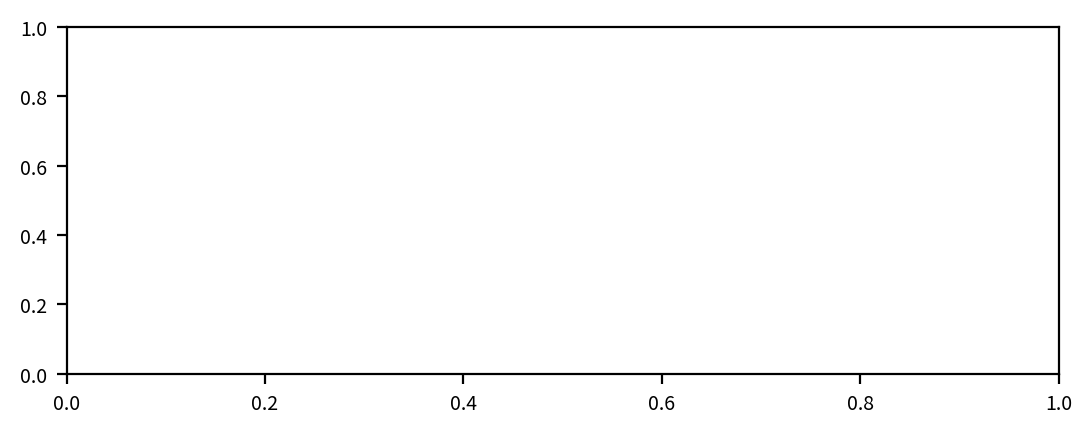

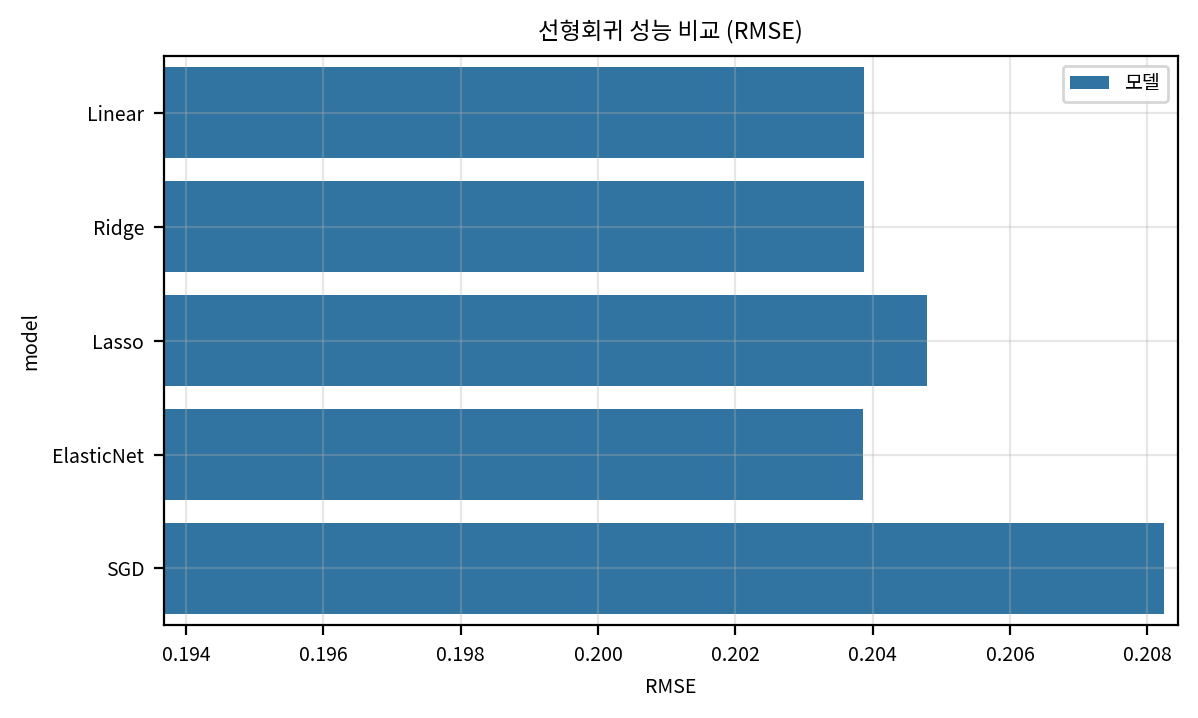

In [29]:
figsize = (1280/my_dpi, 450/my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

# estimator: 요약 방식(np.mean, np.median, np.sum 등)
# errorbar: ('ci', 95)=기본값, ('sd')=표준편차, None = 없음
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# bar 그리기
sb.barplot(data=diff_df,              # 사용할 데이터프레임
           x = '평균오차(RMSE)',            # 막대의 카테고리축
           y =diff_df.index,         # 요약할 수치변수
           label = '모델'           
           )       
ax.set_title('선형회귀 성능 비교 (RMSE)')
ax.set_xlabel('RMSE')
ax.set_ylabel('model')
ax.grid(True, alpha = 0.3)
ax.set_xlim(
    diff_df['평균오차(RMSE)'].min() * 0.95, diff_df['평균오차(RMSE)'].max() * 1.001
)

# 출력
plt.tight_layout()
plt.show()
plt.close()

#### 인사이트
- 1. 종합적인 기준

- Linear 또는 ElasticNet 모델 채택 권장
    - R2 = 0.709로 가장 높은 설명력을 보임
    - RMSE = 0.204로 우수한 예측 정확도
    - MAPE = 0.010으로 상대적 오차율이 낮음
- 모델 간 성능 차이가 미미함
    - R2차이: 0.697~0.709(최대 1.2%p)
    - RMSE 차이: 0.204~0.208(최대 0.004)
    - 규제 기법 적용 시에도 성능 하락이 거의 없음
- SGD 모델은 상대적으로 열위
    - 모든 지표에서 최저 성능
    - MPE = 0.253으로 체계적 편향 가능성

- 2. RMSE 중심 기준

- Linear, Ridge, ElasticNet 동일 우위
    - 세 모델 모두 RMSE = 0.204로 동일
    - 실용적 차이 없음
- Lasso는 근소하게 열위
    - RMSE = 0.205(0.001 차이)
    - 변수 선택 효과보다 성능 손실이 미세하게 발생
- SGD는 RMSE 관점에서도 최저
    - RMSE = 0.208로 약 2% 높은 오차

## 미션5. 팀에 보고할 '최종 모델'을 하나 고르자

### 1. 과적합 판정 함수



In [30]:
def hs_learning_cv(
        estimator,
        x,
        y,
        scoring ='neg_root_mean_squared_error',
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs = -1
):
    train_sizes, train_scores, cv_scores = learning_curve(
        estimator=estimator,
        X=x,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs,
        shuffle=True,
        random_state=52
    )

    model_name = estimator.named_steps['model'].__class__.__name__
    print(f'=== Learning Curve: {model_name}===')

    # neg RMSE -> RMSE
    train_rmse = -train_scores
    cv_rmse = -cv_scores

    # 평균 / 표준편차
    train_mean = train_rmse.mean(axis=1)
    cv_mean = cv_rmse.mean(axis=1)
    cv_std = cv_rmse.std(axis=1)

    # 마지막 지정 기준 정량 판정
    final_train = train_mean[-1]
    final_cv = cv_mean[-1]
    final_std = cv_std[-1]
    gap_ratio = final_train / final_cv
    var_ratio = final_std / final_cv
    
    # 과소적합 기준선 (some_threshold)
    # 기준모형 RMSE (평균예측)

    y_mean = y.mean()
    rmse_naive = np.sqrt(np.mean((y - y_mean) ** 2))

    # 분산 기반
    std_y = y.std()

    # 최소 설명력(R2)기반
    min_r2 = 0.10
    rmse_r2 = np.sqrt((1 - min_r2) * np.var(y))

    # 최종 threshold (가장 관대한 기준)
    # -> 원래 some_threshold는 도메인 지식 수준에서 이 모델은 최소 어느 정도의 성능은 내야 한다는 기준을 설정하는 것

    some_threshold = min(rmse_naive, std_y, rmse_r2)

    if gap_ratio >= 0.95 and final_cv > some_threshold:
        status = ('과소적합: bias 큼')
    elif gap_ratio <= 0.8:
        status = ('과대적합: variance 큼')
    elif gap_ratio <= 0.95 and var_ratio <= 0.10:
        status = ('일반화 양호')
    elif var_ratio > 0.15:
        status = ('데이터 부족: 분산 큼')
    else:
        status = ('판단 유보: 추가 지표 필요')

    # 정량 결과 표
    result_df = DataFrame({
        '지표': [
            'Train RMSE',
            'CV RMSE 평균',
            'CV RMSE 표준편차',
            'Train/CV 비율',
            'CV 변동성 비율',
            '판정 결과'
        ],
        '값':[
            final_train,
            final_cv,
            final_std,
            gap_ratio,
            var_ratio,
            status,
        ]
    })

    display(result_df)

    # 시각화

    figsize = (1200/my_dpi, 720/my_dpi)
    fig, ax = plt.subplots(1, 1, figsize = figsize, dpi = my_dpi)

    sb.lineplot(x = train_sizes, y = train_mean, marker = 'o', markeredgecolor = '#ffffff', label ='Train RMSE')
    sb.lineplot(x = train_sizes, y = cv_mean, marker = 'o', markeredgecolor = '#ffffff', label ='Train RMSE')


    ax.set_xlabel('RMSE', fontsize=8, labelpad=5)
    ax.set_ylabel('학습곡선(Learning Curve)', fontsize=8, labelpad=5)
    ax.grid(True, alpha = 0.3)

    plt.tight_layout()
    plt.show()
    plt.close()

### 2. 훈련 모델별 과적합 판정


=== Learning Curve: LinearRegression===


,지표,값
0,Train RMSE,0.197552
1,CV RMSE 평균,0.203111
2,CV RMSE 표준편차,0.01215
3,Train/CV 비율,0.97263
4,CV 변동성 비율,0.059819
5,판정 결과,판단 유보: 추가 지표 필요


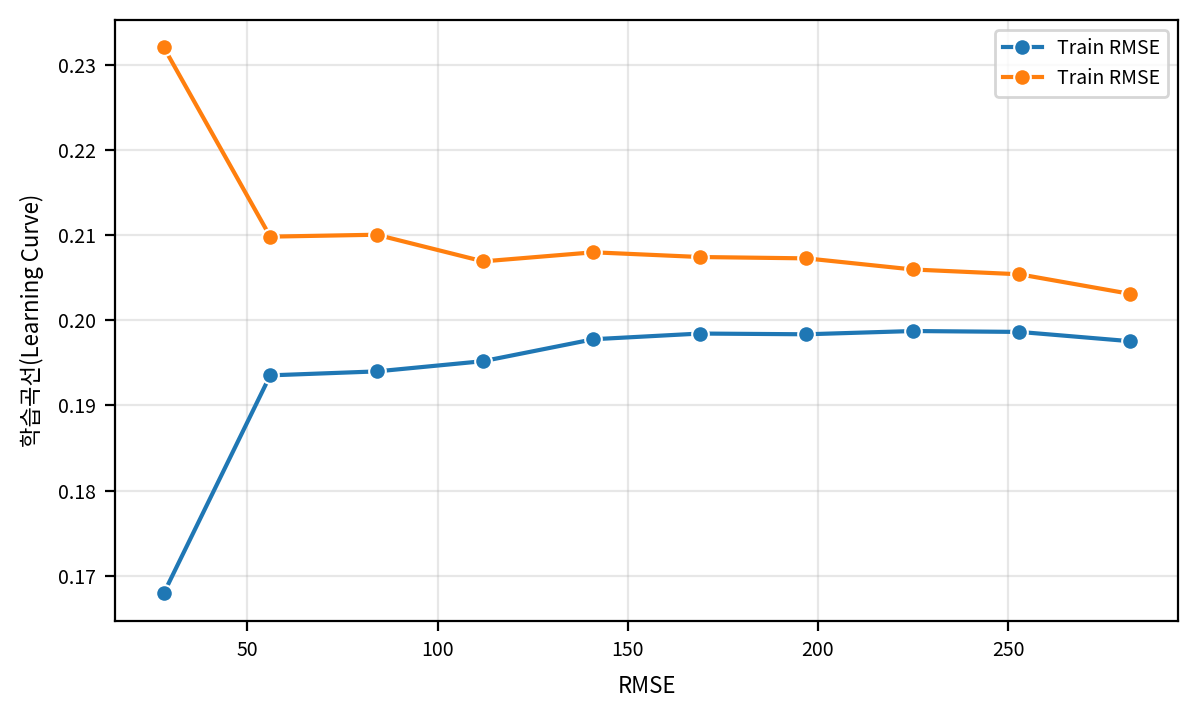

=== Learning Curve: Ridge===


,지표,값
0,Train RMSE,0.197661
1,CV RMSE 평균,0.203012
2,CV RMSE 표준편차,0.012136
3,Train/CV 비율,0.973641
4,CV 변동성 비율,0.059781
5,판정 결과,판단 유보: 추가 지표 필요


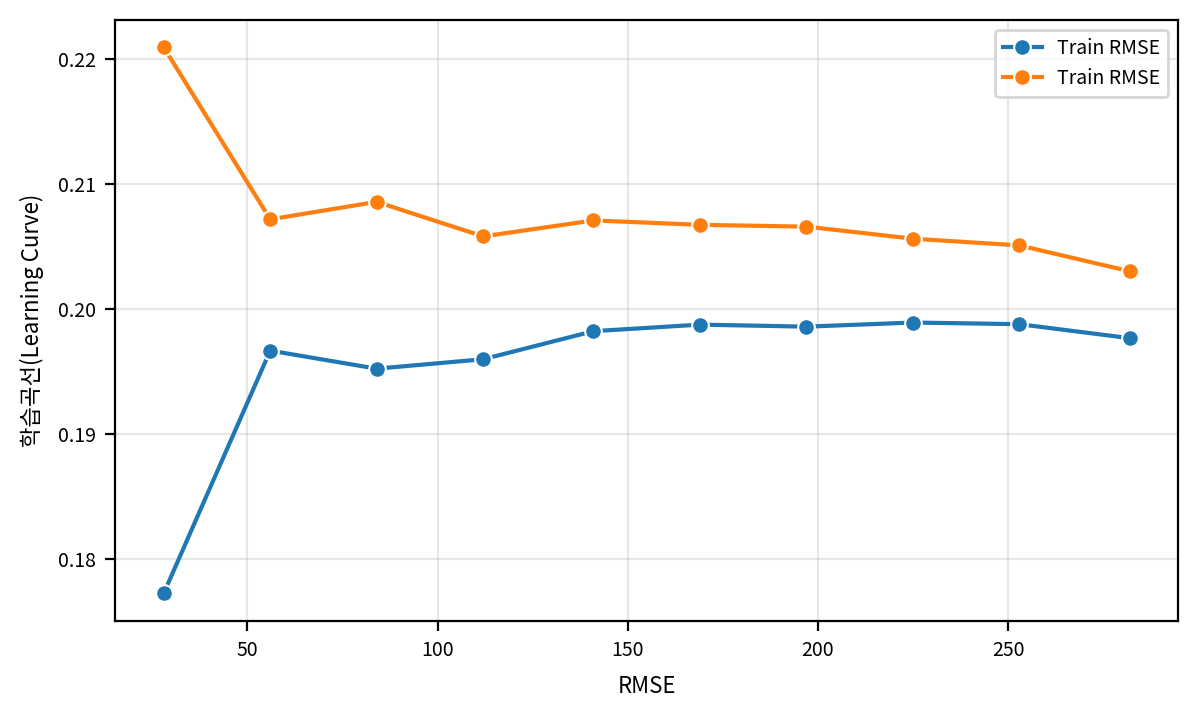

=== Learning Curve: Lasso===


,지표,값
0,Train RMSE,0.199085
1,CV RMSE 평균,0.20364
2,CV RMSE 표준편차,0.011158
3,Train/CV 비율,0.977635
4,CV 변동성 비율,0.054793
5,판정 결과,판단 유보: 추가 지표 필요


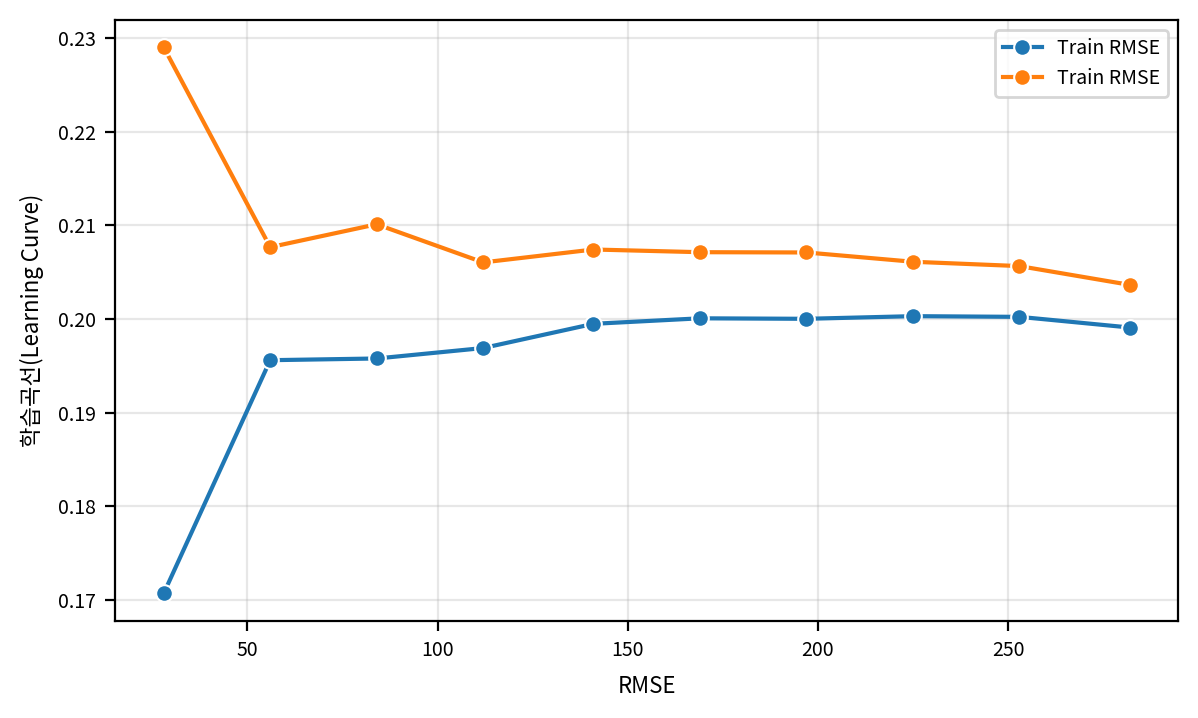

=== Learning Curve: ElasticNet===


,지표,값
0,Train RMSE,0.197594
1,CV RMSE 평균,0.202956
2,CV RMSE 표준편차,0.012
3,Train/CV 비율,0.973582
4,CV 변동성 비율,0.059127
5,판정 결과,판단 유보: 추가 지표 필요


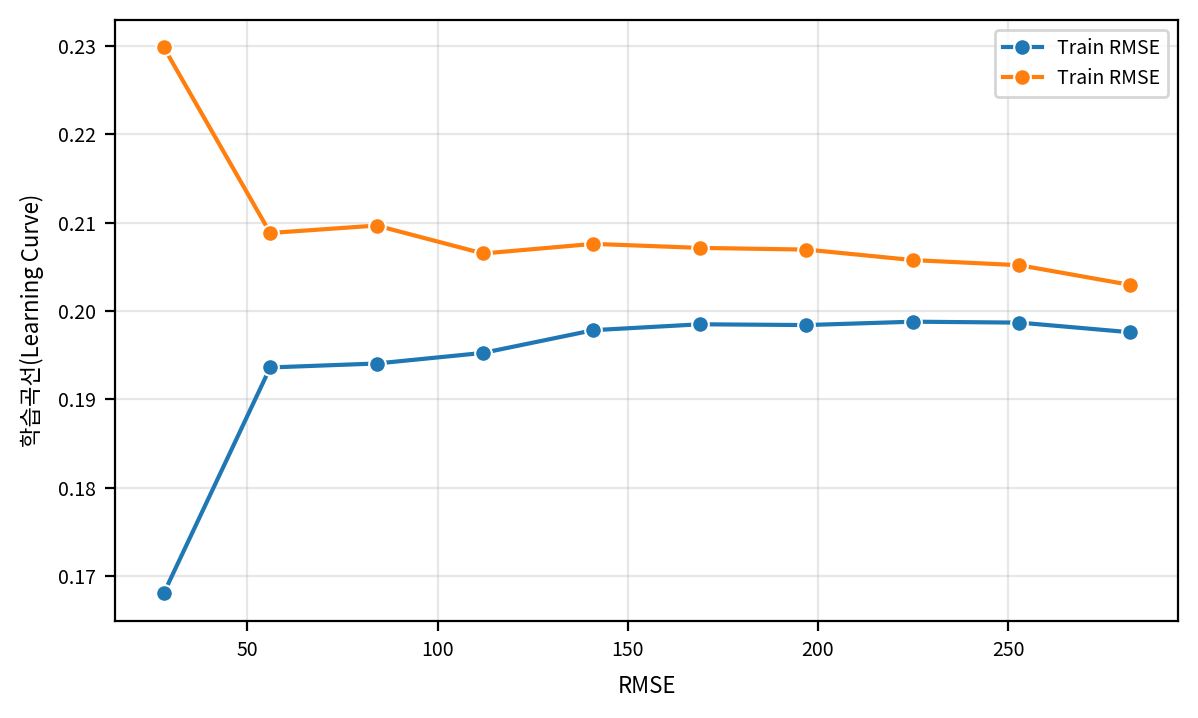

=== Learning Curve: SGDRegressor===


,지표,값
0,Train RMSE,0.198632
1,CV RMSE 평균,0.203471
2,CV RMSE 표준편차,0.011989
3,Train/CV 비율,0.976219
4,CV 변동성 비율,0.058922
5,판정 결과,판단 유보: 추가 지표 필요


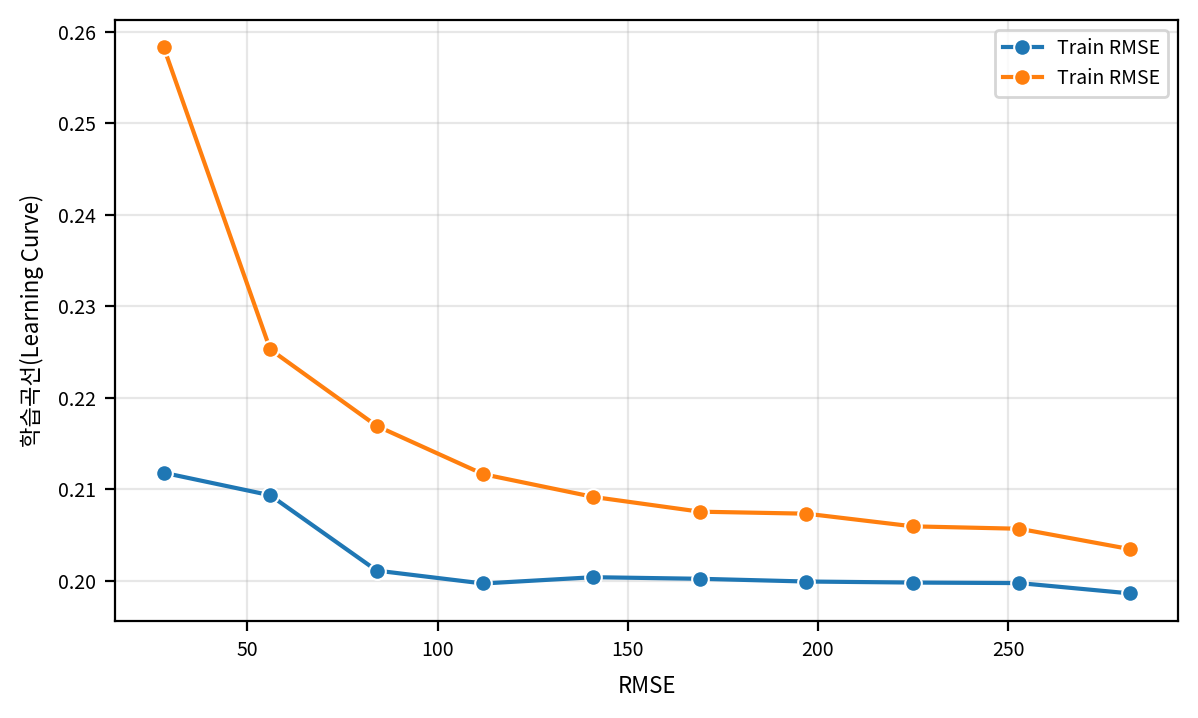

In [31]:
models = [
    linear_estimator,
    ridge_estimator,
    lasso_estimator,
    en_estimator,
    sgd_estimator
]

for m in models:
    hs_learning_cv(estimator=m, x=x, y=y)

#### 인사이트

- 최적 모형: Linear
    - CV RMSE 평균이 0.203으로 최저 수준(동률)
    - CV RMSE 표준편차 0.012로 안정적
    - 동일 성능이면 단순한 모델이 우선 선택

## 미션 6. 이 모델은 설명 가능한가?

### 1. 선형성

In [32]:
estimator = linear_estimator

rdf = x_train.copy()
rdf['sales'] = y_train

# 예측치
rdf['y_pred'] = estimator.predict(x_train)

# 잔차
rdf['resid'] = rdf[yname] - rdf['y_pred']

rdf.head()

,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday_0,holiday_1,weekend_0,weekend_1,sales,y_pred,resid
date,,,,,,,,,,,,,
2024-06-11,129,8590,8.987322,0.41,2.028148,14.2,1,0,1,0,16.142334,16.062723,0.079611
2024-06-20,115,22020,8.412055,0.38,2.219203,8.0,1,0,1,0,15.944358,16.126344,-0.181987
2024-08-25,115,14630,9.457279,0.49,2.251292,-2.9,0,1,0,1,16.579528,16.767852,-0.188325
2024-11-22,137,16830,8.810012,0.38,1.193922,0.7,1,0,1,0,16.408428,16.291046,0.117381
2024-12-30,106,13370,8.537192,0.48,2.197225,9.6,1,0,1,0,16.234921,15.955658,0.279263


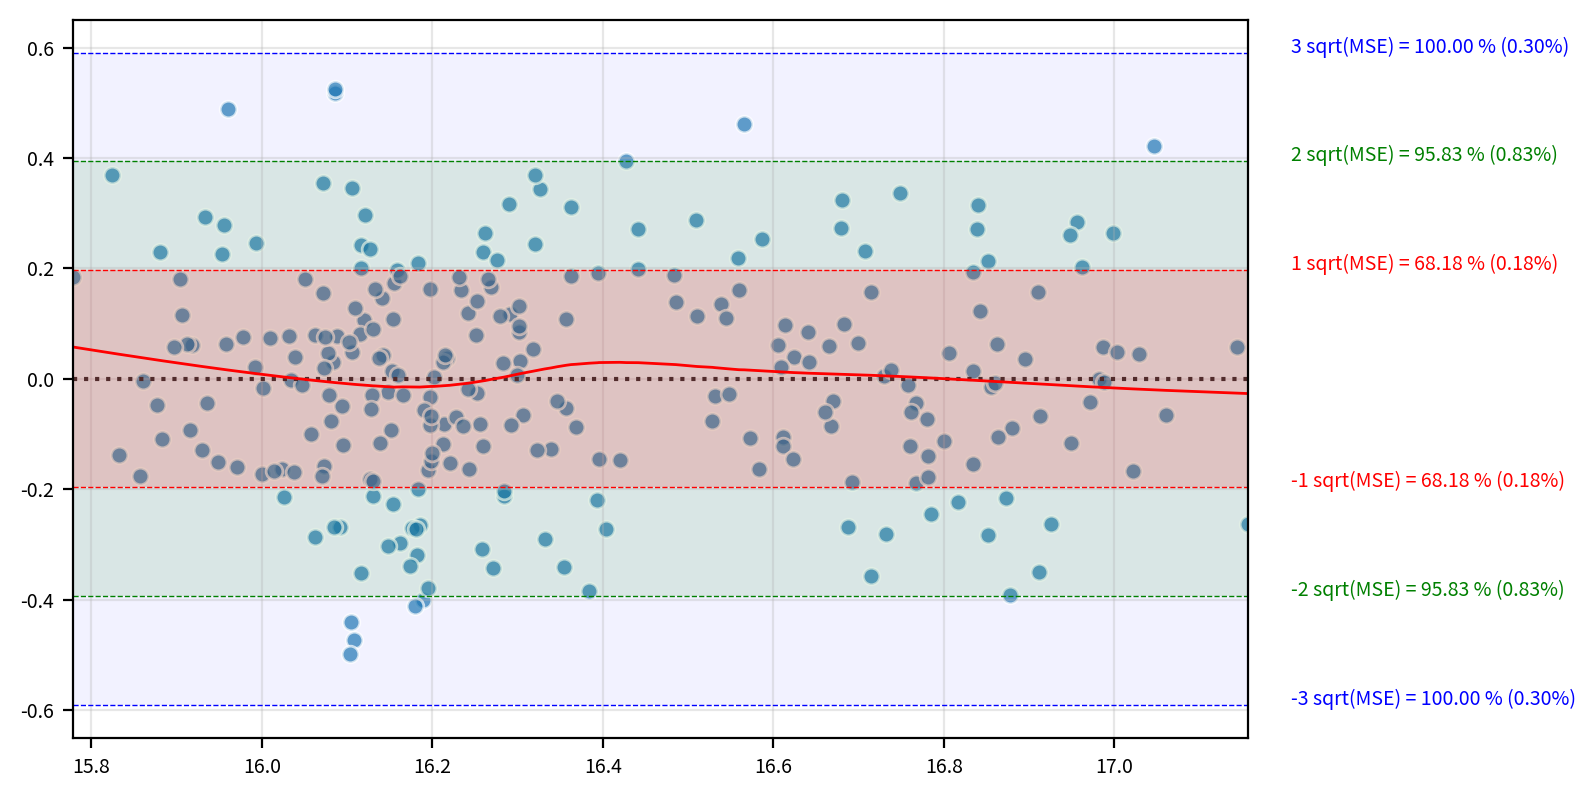

In [33]:
y = rdf[yname].values
y_pred = rdf['y_pred'].values
resid = rdf['resid'].values

figsize = (1600 / my_dpi, 800 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

# 잔차 산점도
sb.residplot(
    x=y_pred,
    y=resid,
    lowess=True, # 잔차의 추세선 표시
    line_kws={'color':'red', 'linewidth':1}, # 추세선 스타일
    scatter_kws ={'edgecolor':'white', 'alpha': 0.7}
)

# MSE표시
mse_val = mean_squared_error(y, y_pred)
mse_sq = np.sqrt(mse_val)

r1 = resid[(resid > -mse_sq) & (resid < mse_sq)].size / resid.size * 100
r2 = resid[(resid > -2 * mse_sq) & (resid < 2 * mse_sq)].size / resid.size * 100
r3 = resid[(resid > -3 * mse_sq) & (resid < 3 * mse_sq)].size / resid.size * 100

mse_r = [r1, r2, r3]

xmin, xmax = ax.get_xlim()

# 구간별 반투명 색상 채우기 (안쪽부터 바깥쪽으로, 진한 색에서 연한 색으로)
colors = ['red', 'green','blue']
alphas = [0.15, 0.10, 0.05]  # 안쪽이 더 진하게

# 3a 영역 (가장 바깥쪽, 가장 연함)
ax.axhspan(-3 * mse_sq, 3 * mse_sq, facecolor=colors[2], alpha=alphas[2], zorder=0)
# 2a 영역 (중간)
ax.axhspan(-2 * mse_sq, 2 * mse_sq, facecolor=colors[1], alpha=alphas[1], zorder=1)
# 1a 영역 (가장 안쪽, 가장 진함)
ax.axhspan(-1 * mse_sq, 1 * mse_sq, facecolor=colors[0], alpha=alphas[0], zorder=2)

# 경계선 그리기
for i, c in enumerate(['red', 'green','blue']):
    ax.axhline(mse_sq * (i+1), color=c, linestyle='--',linewidth=0.5)
    ax.axhline(mse_sq * (-(i+1)), color=c, linestyle='--',linewidth=0.5)

target = [68, 95, 99.7]
for i, c in enumerate(['red','green','blue']):
    ax.text(
        s=f'{i+1} sqrt(MSE) = {mse_r[i]:.2f} % ({mse_r[i] - target[i]:.2f}%)',
        x=xmax + 0.05,
        y=(i+1) * mse_sq,
        color=c
    )
    ax.text(
        s=f'-{i+1} sqrt(MSE) = {mse_r[i]:.2f} % ({mse_r[i] - target[i]:.2f}%)',
        x=xmax + 0.05,
        y=-(i+1) * mse_sq,
        color=c
    )
ax.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()
plt.close()

### 2. 정규성


In [34]:
residuals = rdf['resid'].values
n = len(residuals)
alpha = 0.05
results =[]

# 1. Shapiro-Wilk 검정 (샘플 크기 < 5000일 때 권장)
if n< 5000:
    try:
        stat_sw, p_sw = shapiro(residuals)
        significant_sw = p_sw <= alpha

        if significant_sw:
            interpretation_sw = f'정규성 위반 (p={p_sw:.4f} <= {alpha})'
        else:
            interpretation_sw = f'정규성 만족 (p={p_sw:.4f} > {alpha})'

        results.append(
            {
                '검정': 'Shapiro-Wilk',
                '검정통계량': f'{stat_sw:.4f}',
                'p-value': f'{p_sw:.4f}',
                '유의수준': alpha,
                '정규성_위반': significant_sw,
                '해석': interpretation_sw
            }
        )
    except Exception as e:
        pass

# 2. Jarque-Bera 검정 (항상 수행)
try:
    stat_jb, p_jb = jarque_bera(residuals)
    significant_jb = p_jb <= alpha

    if significant_jb:
        interpretation_jb = f'정규성 위반 (p={p_jb:.4f} <= {alpha})'
    else:
        interpretation_jb = f'정규성 만족 (p={p_jb:.4f} > {alpha})'

    results.append(
            {
                '검정': 'Jarque-Bera',
                '검정통계량': f'{stat_jb:.4f}',
                'p-value': f'{p_jb:.4f}',
                '유의수준': alpha,
                '정규성_위반': significant_jb,
                '해석': interpretation_jb
            }
    )
except Exception as e:
    pass

result_df = DataFrame(results)
result_df

,검정,검정통계량,p-value,유의수준,정규성_위반,해석
0,Shapiro-Wilk,0.9970,0.9049,0.05,False,정규성 만족 (p=0.9049 > 0.05)
1,Jarque-Bera,0.8845,0.6426,0.05,False,정규성 만족 (p=0.6426 > 0.05)


### 3. 등분산성

In [35]:
resid = rdf['resid']
alpha = 0.05
results =[]

exog = rdf.drop(columns =[yname, 'y_pred', 'resid'])
exog = sm.add_constant(exog)
exog.head()

# 1. Breusch-Pagan 검정
try:
    lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(resid, exog)
    significant_bp = lm_pvalue <= alpha
    
    if significant_bp:
        interpretation_bp = f'등분산성 위반 (p={lm_pvalue:.4f} <= {alpha})'
    else:
        interpretation_bp = f'등분산성 만족 (p={lm_pvalue:.4f} > {alpha})'

    results.append(
            {
                '검정': 'Breusch-Pagan',
                '검정통계량(LM)': f'{lm:.4f}',
                'p-value': f'{lm_pvalue:.4f}',
                '유의수준': alpha,
                '정규성_위반': significant_bp,
                '해석': interpretation_bp
            }
        )
except Exception as e:
    pass

# 2. White 검정
try:
    lm, lm_pvalue, fvalue, f_pvalue = het_white(resid, exog)
    significant_white = lm_pvalue <= alpha
    
    if significant_white:
        interpretation_white = f'등분산성 위반 (p={lm_pvalue:.4f} <= {alpha})'
    else:
        interpretation_white = f'등분산성 만족 (p={lm_pvalue:.4f} > {alpha})'

    results.append(
            {
                '검정': 'White',
                '검정통계량(LM)': f'{lm:.4f}',
                'p-value': f'{lm_pvalue:.4f}',
                '유의수준': alpha,
                '정규성_위반': significant_white,
                '해석': interpretation_white
            }
        )
except Exception as e:
    pass

result_df = DataFrame(results)
result_df

,검정,검정통계량(LM),p-value,유의수준,정규성_위반,해석
0,Breusch-Pagan,5.3636,0.8656,0.05,False,등분산성 만족 (p=0.8656 > 0.05)
1,White,28.5775,0.9287,0.05,False,등분산성 만족 (p=0.9287 > 0.05)


### 4. 독립성

In [36]:
# Durbin-Watson 통계량 계산
dw_stat = durbin_watson(rdf['resid'])

# 자기상관 판단(1.5 < DW < 2.5 범위를 독립성 만족으로 판단)
is_autocorrelated = dw_stat < 1.5 or dw_stat > 2.5

# 해석 메시지 생성
if dw_stat < 1.5:
    interpretation = f'DW = {dw_stat:.4f} < 1.5 (양의 자기상관)'
elif dw_stat > 2.5:
    interpretation = f'DW = {dw_stat:.4f} > 2.5 (음의 자기상관)'
else:
    interpretation = f'DW = {dw_stat:.4f} (독립성 가정 만족)'

# 결과 데이터프레임 생성
result_df = DataFrame(
    {
        '검정': ['Durbin-Watson'],
        '검정통계량(DW)': [dw_stat],
        '독립성_위반': [is_autocorrelated],
        '해석': [interpretation]
    }
)

result_df

,검정,검정통계량(DW),독립성_위반,해석
0,Durbin-Watson,1.933538,False,DW = 1.9335 (독립성 가정 만족)


## 미션 7. 최종 보고

### 1. 모형 적합도 보고


In [37]:
from scipy.stats import f
# 잔차 분석용 예측값 및 잔차 계산
y_train_pred = estimator.predict(x_train)
resid = y_train - y_train_pred

# Durbin-Watson 통계량 계산
dw = durbin_watson(resid)

# 결정계수 및 조정된 결정계수 계산
xnames = x_train.columns.tolist()
r2 = r2_score(y_train, y_train_pred)
r = np.sqrt(r2)
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - len(xnames) - 1)

# F-statistic
rowcount = len(x_train)
featurecount = len(xnames)
f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

# p-value 계산
p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

# 결과 데이터프레임 생성
rdf = DataFrame(
    {
    'R': [r],
    'R2': [r2],
    'Adj R2': [adj_r2],
    'F': [f_statistic],
    'p-value': [p],
    'Durbin-Watson': [dw]
    }
)

rdf

,R,R2,Adj R2,F,p-value,Durbin-Watson
0,0.857071,0.734571,0.72408,70.017481,1.110223e-16,1.933538


In [38]:
tpl = '%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s, %s) = %0.3f, p%s 0.05)'

tpl % (
    yname,
    ','.join(xnames),
    '유의하다' if p<= 0.05 else '유의하지 않다',
    len(x_train.columns),
    len(x_train.index) - len(x_train.columns) -1,
    f_statistic,
    '<=' if p <= 0.05 else '>'
)

'sales에 대하여 visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday_0,holiday_1,weekend_0,weekend_1로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(10, 253) = 70.017, p<= 0.05)'

### 2. 독립변수 보고

In [43]:
# 절편과 계쑤를 하나의 배열로 결합
# GridSearchCV를 사용할 경우
params = np.append(
    estimator.named_steps['model'].intercept_, estimator.named_steps['model'].coef_
)

# 독립변수에 상수항 추가
design_x = x_train.copy()
design_x = sm.add_constant(design_x)

# 독립변수의 행렬곱
dot = np.dot(design_x.T, design_x)

# 역행렬의 대각선 반환
inv = np.linalg.inv(dot)
# 역행렬의 대각선 반환
dia = inv.diagonal()

# 평균제곱오차
predictions = estimator.predict(x_train)
n = design_x.shape[0] # 샘플 수
p = design_x.shape[1] # 변수 개수(상수항 포함)
MSE = ((y_train - predictions) ** 2).sum() / (n-p)

# 표준오차
se_b = np.sqrt(MSE * dia)

# t-통계량
ts_b = params / se_b

# p-값
n = design_x.shape[0]
p = design_x.shape[1]
p_values = [2 * (1 - t.cdf(np.abs(i), n-p)) for i in ts_b]

# vif
vif = []

# 상수항 추가
x_con = sm.add_constant(x_train)

for i, v in enumerate(xnames):
    j = list(x_train.columns).index(v)
    vif.append(variance_inflation_factor(x_con, j + 1))

# 표준화 계수(베타)구하기
tmp_df = x_train.copy()
tmp_df[yname] = y_train

scaler = StandardScaler()
std = scaler.fit_transform(tmp_df)
std_df = DataFrame(std, columns = tmp_df.columns)

std_x = std_df.drop(columns =[yname])
std_y = std_df[yname]
estimator.fit(std_x, std_y)

# GridSerachCV를 사용할 경우
beta = estimator.named_steps['model'].coef_

# 결과표 구성하기
result_df = DataFrame(
    {
        '종속변수': [yname] * len(xnames),
        '독립변수': xnames,
        'B(비표준화 계수)': np.round(params[1:], 4),
        '표준오차': np.round(se_b[1:], 4),
        't': np.round(ts_b[1:], 4),
        '유의확률': np.round(p_values[1:], 4),
        'VIF': np.round(vif, 4)
    }
)

# 유의확률에 따라 t별표 추가
result_df['t'] = result_df['t'].astype('str') + result_df['유의확률'].apply(
    lambda p: '***' if p < 0.001 else '**' if p <0.01 else '*' if p < 0.05 else ''
)

result_df


VIF 제거 반복1회차 ================
모든 변수의 VIF가 임계값 이하가 되어 종료합니다. 제거된 변수0개


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37760\290525238.py:26: RuntimeWarning: invalid value encountered in sqrt
  se_b = np.sqrt(MSE * dia)
c:\Users\wodyd\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,종속변수,독립변수,B(비표준화 계수),표준오차,t,유의확률,VIF
0,sales,visitors,0.1128,1.799000e+01,0.0063,0.9950,1.0203
1,sales,avg_price,0.1881,5.040000e-02,3.735***,0.0002,1.0286
2,sales,marketing_cost,0.2789,3.171314e+02,0.0009,0.9993,1.0115
3,sales,delivery_ratio,0.0121,1.592318e+03,0.0,1.0000,1.0184
4,sales,rain_mm,-0.1900,2.907763e+02,-0.0007,0.9995,1.0429
5,sales,temperature,0.0433,1.759350e+01,0.0025,0.9980,1.0120
6,sales,holiday_0,-0.1391,NaN,nan,NaN,inf
7,sales,holiday_1,0.1391,NaN,nan,NaN,inf
8,sales,weekend_0,-0.2321,1.276185e+10,-0.0,1.0000,inf
9,sales,weekend_1,0.2321,1.276185e+10,0.0,1.0000,inf


In [45]:
varstr = []

for n in xnames:
    item = result_df[result_df['독립변수'] == n]
    coef = float(item['B(비표준화 계수)'].values[0])
    pvalue = float(item['유의확률'].values[0])

    s = '%s가 1증가하면 %s(이)가 %0.3f만큼 변하는 것으로 나타남 (p %s 0.05, %s)'
    k = s % (
        n,
        yname,
        coef,
        '<=' if pvalue <= 0.05 else '>',
        ('유의함' if pvalue <= 0.05 else '유의하지 않음')
    )

    varstr.append(k)

varstr

['visitors가 1증가하면 sales(이)가 0.113만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'avg_price가 1증가하면 sales(이)가 0.188만큼 변하는 것으로 나타남 (p <= 0.05, 유의함)',
 'marketing_cost가 1증가하면 sales(이)가 0.279만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'delivery_ratio가 1증가하면 sales(이)가 0.012만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'rain_mm가 1증가하면 sales(이)가 -0.190만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'temperature가 1증가하면 sales(이)가 0.043만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'holiday_0가 1증가하면 sales(이)가 -0.139만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'holiday_1가 1증가하면 sales(이)가 0.139만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'weekend_0가 1증가하면 sales(이)가 -0.232만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)',
 'weekend_1가 1증가하면 sales(이)가 0.232만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)']